##### Grading Feedback Cell


# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.


## Note that this notebook is expected to run in the Google Colab environment.  All grading for this assignment will take place exclusively in Google Colab.

The following cell reads the data files needed for this homework from github and stores it on your local colab instance.


In [ ]:
%%bash
# Do not change or modify this file
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download the data files from github
# If the data file does not exist in the colab environment
if [[ ! -f ./quotes_by_char.csv ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv  
fi

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=0b1cd10dab67b9a9ac31c520b300c8a3ecc5bed1158adc45239678b2edc110be
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


--2020-11-09 00:57:30--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/quotes_by_char.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352265 (4.2M) [text/plain]
Saving to: ‘quotes_by_char.csv’

     0K .......... .......... .......... .......... ..........  1% 1.90M 2s
    50K .......... .......... .......... .......... ..........  2% 4.06M 2s
   100K .......... .......... .......... .......... ..........  3% 12.2M 1s
   150K .......... .......... .......... .......... ..........  4% 14.5M 1s
   200K .......... .......... .......... .......... ..........  5% 7.30M 1s
   250K .......... .......... .......... .......... ..........  7% 18.2M 1s
   300K .......... .......... .......... .......... ..........  8% 24.3M 1s
   350K .......... .......

William Shakespeare is considered one of the greatest playwrights in the English language. He is attributed with 38 plays, 154 sonnets, and other works. Even 400 years later, his writings are still be studied in most high schools and colleges in the US and elsewhere. Shakespeare’s complete works are available online at http://shakespeare.mit.edu/.  We will be using a data set which has Shakespeare character quotes.  A lot of people are fascinated by the characters in the Shakespeare plays.  The first first part of the assignment is to create a Shakespeare character recommender system which is capable of recommending new characters which are similar to a speicific character of interest.  We will also explore using PCA inference to find important words in character quotes.  In the second part of the assignment we will use K-Means clustering to try and find one or more character insights. 

# Part 1: Shakespeare Recommender System

# Question 1 (10 pts)
Read the quotes_by_char.csv file into a spark dataframe named `quotes_by_char_df`.  Drop the `Unnamed` column.  Transform the character column such that all character names are lower case.

In [ ]:
# Your code here
from pyspark import SQLContext
from pyspark.sql import SparkSession

spark = SparkSession \
  .builder \
  .master("local[*]")\
  .config("spark.memory.fraction", 0.8) \
  .config("spark.executor.memory", "12g") \
  .config("spark.driver.memory", "12g")\
  .config("spark.memory.offHeap.enabled",'true')\
  .config("spark.memory.offHeap.size","12g")\
  .getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

quotes_by_char_df = sqlContext.read.csv("quotes_by_char.csv",  header='True')

In [ ]:
import pyspark.sql.functions as f

quotes_by_char_df = quotes_by_char_df.drop('_c0')

quotes_by_char_df = quotes_by_char_df.withColumn('character',f.lower(f.col('character')))

In [ ]:
# grading cell do not modify
display(quotes_by_char_df.toPandas().head())

,character,all_quotes
0,& c,"Well met, Master Ford."
1,a lord,"Sir, it was I."
2,a patrician,This man has marr'd his fortune. You do the no...
3,a player,So please your lordship to accept our duty. I ...
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ..."


##### Grading Feedback Cell Do Not Modify

# Question 2 (10 pts)
Create a spark pipeline named `pipe_pca_1` which performs Principal Component Analysis (PCA) on `chars_df`.  Use `pipe_pca_1` to create a new dataframe named `chars_pca_df`.  Analyze the resulting number of TF-IDF data rows and columns in your data.  Add code to the specially marked code cell below which prints the number of rows and cols in your TF-IDF data.  Using the analysis for the number of rows and cols in the data, explicitly set the K parameter in the spark PCA object equal to the maximum number of principal components.  Your overall solution should use sound data science techniques as outlined in lecture for making TF-IDF and PCA score calculations. We will be looking closely at how these calculations are made during the grading process.

In [ ]:
# your code to create chars_pca_df here
from pyspark.ml import feature
from pyspark.ml import Pipeline
import requests

tokenizer = feature.RegexTokenizer(minTokenLength=2)\
  .setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("all_quotes")\
  .setOutputCol("words")

stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

sw_filter = feature.StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

cv = feature.CountVectorizer(minTF=4, minDF=10, inputCol='filtered', outputCol='tf')
idf = feature.IDF(inputCol='tf', outputCol='tfidf')

tfidf = Pipeline(stages=[tokenizer, sw_filter, cv, idf]).fit(quotes_by_char_df)
chars_df = tfidf.transform(quotes_by_char_df)


In [ ]:
# your code here to print the number of rows and cols in the TF-IDF data in chars_pca_df here

print('number of rows =',chars_df.count())
temp_df = chars_df.toPandas()
print('number of words =',temp_df['tfidf'].iloc[0].size)

number of rows = 966
number of words = 4365


In [ ]:
center = feature.StandardScaler(withMean=True, withStd=False, inputCol='tfidf', outputCol='centered_tfidf')

pca = feature.PCA(k=500, inputCol='centered_tfidf', outputCol='scores')

pipe_pca_1 = Pipeline(stages=[center, pca])

In [ ]:
pca_model = pipe_pca_1.fit(chars_df)
chars_pca_df = pca_model.transform(chars_df)

In [ ]:
sum(pca_model.stages[-1].explainedVariance)

0.9999999999999936

In [ ]:
# grading cell - do not modify
display(chars_pca_df.toPandas().head())

,character,all_quotes,words,filtered,tf,tfidf,centered_tfidf,scores
0,& c,"Well met, Master Ford.","[well, met, master, ford]","[met, master, ford]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.970879497627593, 1.3397602226012955, -2.30..."
1,a lord,"Sir, it was I.","[sir, it, was]",[sir],"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.970879497627593, 1.3397602226012955, -2.30..."
2,a patrician,This man has marr'd his fortune. You do the no...,"[this, man, has, marr, his, fortune, you, do, ...","[man, marr, fortune, nobler, ay, burn]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.970879497627593, 1.3397602226012955, -2.30..."
3,a player,So please your lordship to accept our duty. I ...,"[so, please, your, lordship, to, accept, our, ...","[lordship, accept, duty, think, twas, soto, ho...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-6.303973377450328, -4.937697269376542, -4.06...","[17.970879497627593, 1.3397602226012955, -2.30..."
4,aaron,"Now climbeth Tamora Olympus' top, Safe out of ...","[now, climbeth, tamora, olympus, top, safe, ou...","[climbeth, tamora, olympus, safe, fortune, sho...","(16.0, 18.0, 13.0, 12.0, 5.0, 4.0, 0.0, 8.0, 8...","(19.21400365250883, 25.00922811532751, 16.3465...","[12.910030275058501, 20.071530845950967, 12.28...","[-37.15074537527132, -11.094130443411721, 5.10..."


##### Grading Feedback Cell

# Question 3 (10 pts):
Analyze the PCA data in `chars_pca_df`.  Create scree and cumulative variance explained plots.  Assuming you were trying to reduce the number of columns to train a machine learning model, how many princiapal components would you pick such that the number of data columns is reduced from the original data set but you still capture a reasonable amount of variance in the data.  Describe in words the number of principal components you would choose and how you arrived at that number of components.

Text(0, 0.5, 'Proportion Variance Explained')

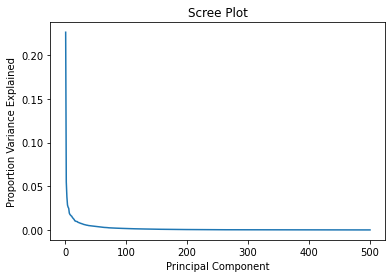

In [ ]:
# your code here
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
explained_var = pca_model.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

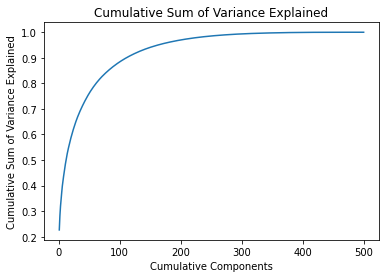

In [ ]:
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")

##### Grading Feedback Cell

Your explanation here: 

I would set # of pca = 200 according to the cumulative sum of variance plot. When # of principle components = 200, the variance explained is slightly reduced from when # of principle components = 500, but it is a lot more efficient. So I would say this is a good trade off point for efficiency and acuuracy.




##### Grading Feedback Cell

# Question 4 (20 pts):
In this question your will write code which makes recommendations on new characters to study based on a specific character that a Shakespeare fan likes.

Create a function named get_nearest_chars that takes 2 arguments: char and num_nearest_chars. The char arg is a string which defines the character for which we are interested in finding similar characters. The num_nearest_chars arg is an integer that defines the total number of nearest characters which we want included in the return list. The get_nearest_chars function shall perform all of its internal operations in spark and return a python list containing a string corresponding to each of the nearest characters defined by num_nearest_chars. Compute the list of characterss which are closest to the char arg using L2 Euclidian distance. 

Hint: Start by creating a new pipe named pipe_pca_2 that is the same as pipe_pca_1 except set K equal to 2 when instantiating the PCA object. We are essentially fixing the number of PCA components to 2 so that we will limit the Euclidian distance to 2 dimensions for this problem. 

Your get_nearest_chars function should rigorously error check input data to verify that the user is not making illegal requests. We plan on trying your code against secret tests which verify your error checking to make the challenge more interesting. You are free to break the problem up into as many sub functions as you wish but you must implement get_nearest_chars as the top level entry point to your code.

In [ ]:
# your code here

pca_2 = feature.PCA(k=2, inputCol='centered_tfidf', outputCol='scores')
pipe_pca_2 = Pipeline(stages=[center, pca_2])
pca_model_2 = pipe_pca_2.fit(chars_df)

In [ ]:
from pyspark.sql import types

def l2_dist(c1, c2):    
    return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))

l2_dist_udf = f.udf(l2_dist, types.FloatType())

In [ ]:
def get_nearest_chars(char, num_nearest_chars):
  if not isinstance(char, str):
    print("wrong inputs")
    return

  if not isinstance(num_nearest_chars, int):
    print("wrong inputs")
    return

  if chars_df.filter(chars_df.character.contains(char)).count() != 1:
    print("wrong inputs")
    return

  temp_df = pca_model_2.transform(chars_df).\
                        where(f.col("character")==char).\
                        select(f.col("scores").alias('cha_scores')).\
                        join(pca_model_2.transform(chars_df)).\
                        withColumn('dist', l2_dist_udf('scores', 'cha_scores')).\
                        select("character", "all_quotes", "dist").\
                        orderBy(f.asc("dist")).\
                        limit(num_nearest_chars+1).\
                        toPandas()

  nearest_chars = temp_df["character"].tolist()
  nearest_chars.pop(0)

  return(nearest_chars)

In [ ]:
# grading cell - do non modify
print(get_nearest_chars('romeo', 5))
print(get_nearest_chars('juliet', 5))

['juliet', 'king henry iv', 'mark antony', 'pericles', 'duke vincentio']
['romeo', 'mark antony', 'duke vincentio', 'king henry iv', 'titus andronicus']


##### Grading Feedback Cell

# Question 5 (10 pts):
Using PCA score data from PC1 and PC2, create a 2 dimensional character visualization plot which shows what characters are similar to the `juliet` character.  Your plot should clearly label the characters closest to juliet but not contain so many labels that it is hard or impossible to interpret.  Filter the data as needed to make a nice visualization which is easy to read and interpret.  You can use pipe_pca_2 for this question.

In [ ]:
# your code here
char_list = get_nearest_chars('juliet', 20)
char_list.insert(0, "juliet")
character_names = np.array(char_list)
temp_df = pca_model_2.transform(chars_df)

X = np.empty((0,2))
for i in range(len(char_list)):
  X = np.append(X, temp_df.select('scores').where(f.col("character")==char_list[i]).rdd.map(lambda x: x['scores']).collect(), axis=0)
  

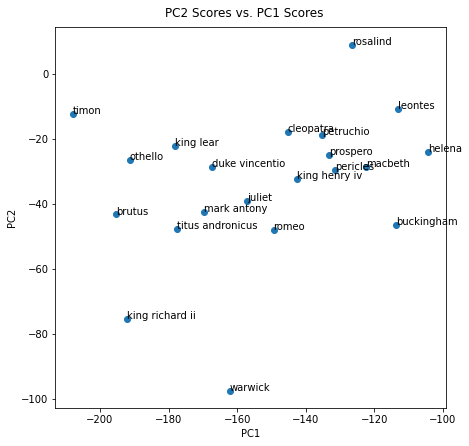

None

In [ ]:

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
ax.scatter(X[:,0], X[:,1])
fig.suptitle("PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(character_names):
    ax.annotate(txt, (X[i,0], X[i,1]))
    
display(plt.show())

##### Grading Feedback Cell

# Question 6 (10 pts)
Perform an inference analysis on the 10 most and 10 least important words in the data set as defined by the absolute value of the PC1 loading vector coefficients.  Present the data by loading and printing 2 Pandas data frames containing the 10 most important words and 10 least important words named `most_imp_df` and `least_imp_df` respectively.  The data frames shall have 2 columns named `word` and `loading`.  Provide a written interpretation of the word importances.  You can use pipe_pca_2 for this question.

In [ ]:
# your code here
import pandas as pd

PC1 = pca_model_2.stages[-1].pc.toArray()[:, 0].tolist()
PC1 = [abs(x) for x in PC1]

vocabulary = tfidf.stages[2].vocabulary


In [ ]:
pc_loadings = pd.DataFrame([vocabulary, PC1]).T.rename(columns={0: 'word', 
                                                                1: 'loading',})

In [ ]:
least_imp_df = pc_loadings.sort_values('loading').head(10)
most_imp_df = pc_loadings.sort_values('loading').tail(10)

In [ ]:
# grading cell - do not modify
display(most_imp_df)
display(least_imp_df)

,word,loading
18,king,0.135062
11,man,0.139621
7,come,0.139967
9,let,0.144801
4,good,0.149801
8,ll,0.153761
2,shall,0.170819
3,thee,0.193031
1,thy,0.210808
0,thou,0.294436


,word,loading
4364,allowance,0
2117,resolution,0
2118,advance,0
2119,bay,0
3309,homage,0
2121,rouse,0
2122,opposed,0
2123,laughter,0
2124,journey,0
3308,rags,0


Your explanation here

A higher absoulte value of the PC1 loading vector coefficients summation indicates how that specific word is correlated to the princeple component. The higher the value, the more positively (if originally>0)/negatively(if originally<0) correlated to the princeple component. 
Most of the words in the most_imp_df seem to be more frequently used. Many of the words are connection words. Whereas the words in the least_imp_df seem to be less frequently used with a loading coefficient of PC1 = 0  


##### Grading Feedback Cell

# Part 2: K-Means Clustering

# Question 7 (10 pts)
Read the python K-means [docs](https://spark.apache.org/docs/latest/ml-clustering.html#k-means).  Use the `chars_pca_df` from question 2 above and compute K-Means silhouette scores for K = 2 through 6 on the PCA score data. You are free to create a new dataframe to reorganize the PCA data or regenerate the data in chars_pca_df if you wish.   Train your model on each K 3 times to find the lowest silhouette score.  The silhouette score is a measure of within cluster variation.  Remember that because K-Means starts out with random cluster assignments, it is not guaranteed to find a global minima so you should make multiple runs to find the lowest score.  Plot the silhouette scores vs. K and report the lowest silhouette score from the plot. If the process of finding the lowest silhouette scores is taking too much time, reduce the number of PCA score columns such that you capture a reasonable amount of variance but complete training in a more reasonable amount of time.  The work you did in question 3 above could be useful here.

In [ ]:
# your code here

from pyspark.ml import clustering
from pyspark.ml import evaluation
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
#build kmeans clustering model
#I inclueded the same codes for each k value. They look a bit redundent, but helpful for plotting different clustering results in question 8

kmeans = clustering.KMeans(k=2, featuresCol='scores', predictionCol='kmeans_feat')
kmeans_pipe = Pipeline(stages=[kmeans])
kmeans_pipe_model = kmeans_pipe.fit(chars_pca_df)

predictions2 = kmeans_pipe_model.transform(chars_pca_df)

In [ ]:
evaluator = ClusteringEvaluator().setFeaturesCol("scores").setPredictionCol("kmeans_feat").setMetricName("silhouette")
silhouette2 = evaluator.evaluate(predictions2)
print("when k = 2, Silhouette score = " + str(silhouette2))

when k = 2, Silhouette score = 0.9755982918350709


In [ ]:
kmeans = clustering.KMeans(k=3, featuresCol='scores', predictionCol='kmeans_feat')
kmeans_pipe = Pipeline(stages=[kmeans])
kmeans_pipe_model = kmeans_pipe.fit(chars_pca_df)

predictions3 = kmeans_pipe_model.transform(chars_pca_df)

evaluator = ClusteringEvaluator().setFeaturesCol("scores").setPredictionCol("kmeans_feat").setMetricName("silhouette")
silhouette3 = evaluator.evaluate(predictions3)
print("when k = 3, Silhouette score = " + str(silhouette3))

when k = 3, Silhouette score = 0.8812799085049696


In [ ]:
kmeans = clustering.KMeans(k=4, featuresCol='scores', predictionCol='kmeans_feat')
kmeans_pipe = Pipeline(stages=[kmeans])
kmeans_pipe_model = kmeans_pipe.fit(chars_pca_df)

predictions4 = kmeans_pipe_model.transform(chars_pca_df)

evaluator = ClusteringEvaluator().setFeaturesCol("scores").setPredictionCol("kmeans_feat").setMetricName("silhouette")
silhouette4 = evaluator.evaluate(predictions4)
print("when k = 4, Silhouette score = " + str(silhouette4))

when k = 4, Silhouette score = 0.871478883372053


In [ ]:
kmeans = clustering.KMeans(k=5, featuresCol='scores', predictionCol='kmeans_feat')
kmeans_pipe = Pipeline(stages=[kmeans])
kmeans_pipe_model = kmeans_pipe.fit(chars_pca_df)

predictions5 = kmeans_pipe_model.transform(chars_pca_df)

evaluator = ClusteringEvaluator().setFeaturesCol("scores").setPredictionCol("kmeans_feat").setMetricName("silhouette")
silhouette5 = evaluator.evaluate(predictions5)
print("when k = 5, Silhouette score = " + str(silhouette5))

when k = 5, Silhouette score = 0.8018071832488798


In [ ]:
kmeans = clustering.KMeans(k=6, featuresCol='scores', predictionCol='kmeans_feat')
kmeans_pipe = Pipeline(stages=[kmeans])
kmeans_pipe_model = kmeans_pipe.fit(chars_pca_df)

predictions6 = kmeans_pipe_model.transform(chars_pca_df)

evaluator = ClusteringEvaluator().setFeaturesCol("scores").setPredictionCol("kmeans_feat").setMetricName("silhouette")
silhouette6 = evaluator.evaluate(predictions6)
print("when k = 6, Silhouette score = " + str(silhouette6))

when k = 6, Silhouette score = 0.7878170858773826


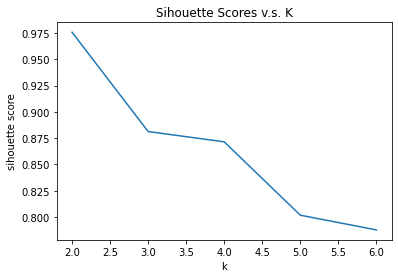

In [ ]:
sihouette_scores = [silhouette2,silhouette3,silhouette4,silhouette5,silhouette6]
k_values = [2,3,4,5,6]

plt.plot(k_values, sihouette_scores)
plt.title('Sihouette Scores v.s. K')
plt.xlabel('k')
plt.ylabel('sihouette score')
plt.show()

##### Grading Feedback Cell

# Question 8 (20 pts)
Perform K-Means clustering using the `chars_pca_df` and plot the results using a scatter plot.  Color the points by cluster assignment.  You are allowed to create a new dataframe from chars_pca_df or regenerate the data if you wish.  The work you did in question 7 above can be applied directly to this problem.  The goal of this question is to try to find an interesting insight about the Shakespeare characters.  For example, perhaps you spot one or more outlier characters that stands apart from the rest of the characters in the cluster.  An example of this is how IST-718 and IST-719 stand out from the rest of the cluster in the unsupervised learning notebook presented in class (though that plot did not use K-Means clustering, it only used PCA).  Note that in the previous example, I am only providing an example of 1 type of interesting insight.  When you find something interesting, add labels to the points of interest so that the reader of your plot can understand the insight.  Provide an explanation of your insight.  This question is completely open ended and you are free to generate the clusters any way you see fit as long as you use K-Means and your methodology follows good data science practices.  You can plot the observation data in 2 dimensions by using PC1 and PC2 as the X and Y coordinates.  Your plot should be easy to read and not overly cluttered.  This question will be graded on your level of effort in comparison to what insights other students in the class find.

In [ ]:
# your code here
characters = chars_pca_df.select("character").rdd.flatMap(lambda x: x).collect()
cluster = predictions2.select("kmeans_feat").rdd.flatMap(lambda x: x).collect()

temp_dict = {'characters':characters, 'kmeans_cluster':cluster}
temp_df = pd.DataFrame(temp_dict)

X = np.array(pca_model_2.transform(chars_df).select('scores').rdd.map(lambda x: x['scores']).collect())
temp_df["pc1"],temp_df["pc2"] = X[:,0], X[:,1]

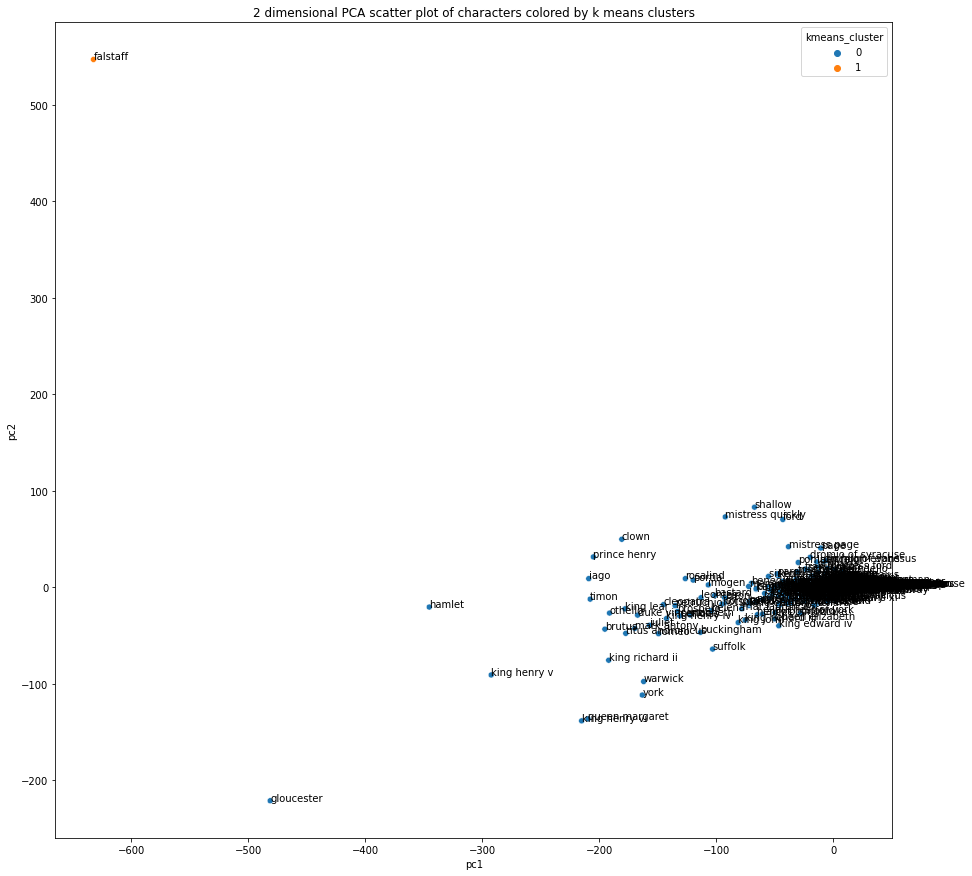

In [ ]:
import seaborn as sns
sns.scatterplot(data=temp_df, x="pc1", y="pc2", hue="kmeans_cluster")
fig = plt.gcf()
fig.set_size_inches( 15, 15)
plt.title("2 dimensional PCA scatter plot of characters colored by k means clusters")


for row in range(0,temp_df.shape[0]):
     plt.text(temp_df.pc1[row]+0.01, temp_df.pc2[row], temp_df.characters[row], horizontalalignment='left', 
     fontsize='medium', color='black', weight='medium')



##### Grading Feedback Cell

Your insight explanation here:

The plot above uses k = 2 in k-means clustering as it gives the best silhouette score, but I had actually plotted for all different k values from 2 to 6 to get insights of the clustering.
In the above plot, only one data point, character = "falstaff", is in its only cluster, everything else belongs to the other cluster. This result is consistent with how "falstaff" is distanced from other points in terms of its pc1 and pc2 scores. I am not very familiar with this character, but I guess its comic characteristic is very different from other characters. 
As I plotted the clustering results with larger k values, the majority of data pints always belong to one cluster, and they are closely distributed around (0,0) on the scatter plot of pc2 v.s. pc1. Whereas data points further away from (0,0) as assigned to new clusters based on their L2 distance.

##### Grading Feedback Cell